In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
from pandas import DataFrame

# Import BeamSection module from FlightBEND
from flightBEND import BeamSection
imgPath = r'./imgs'

*** DONE ***


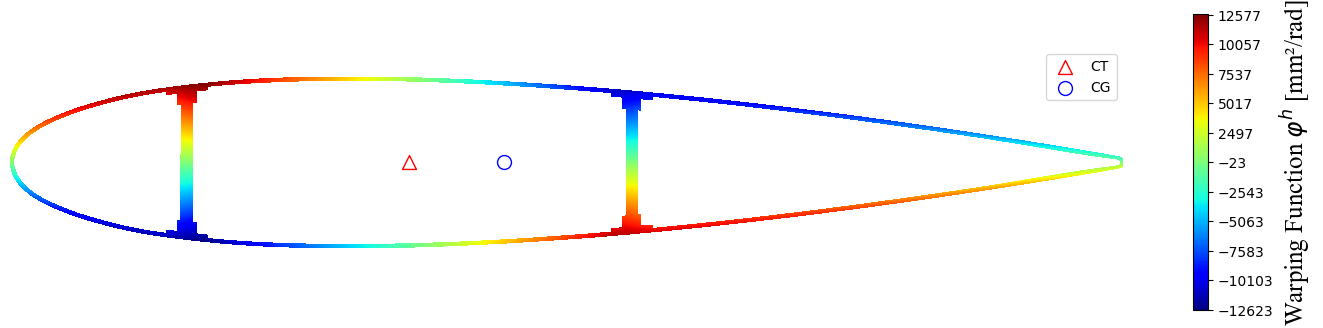

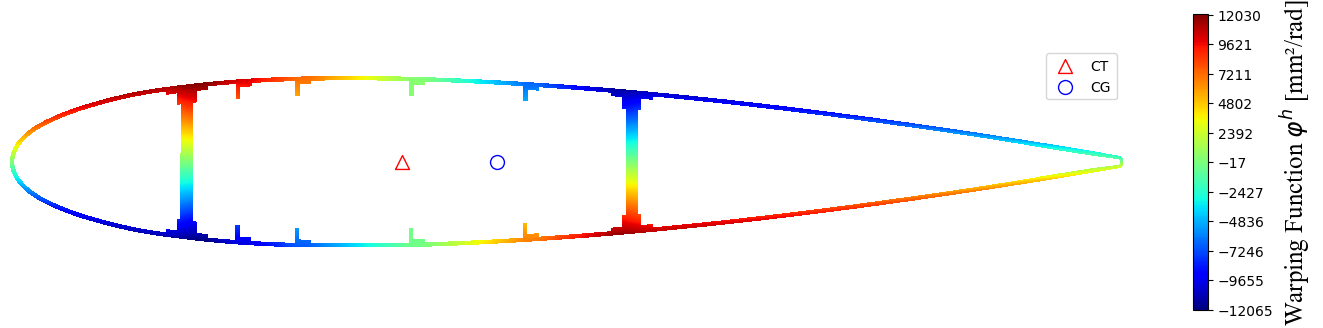

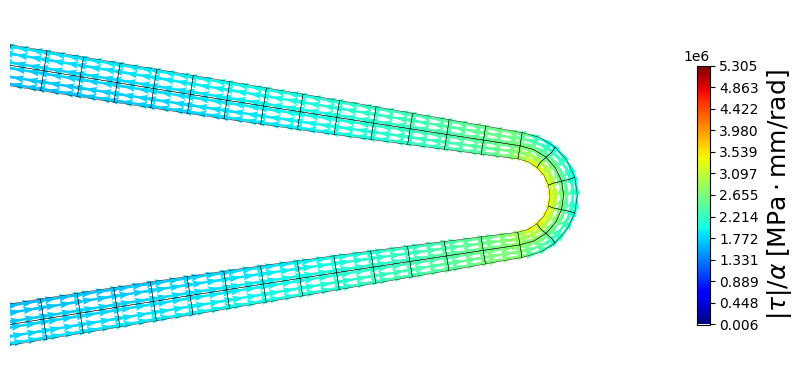

In [23]:
## =============================================== ##
##                  RUN ALL CASES                  ##
## =============================================== ##
# Inicialize an empty dict
dfDict = {}
for i, (withTE, numberOfStringers) in enumerate(product([True],[0,8])):
# for i, (withTE, numberOfStringers) in enumerate(product([False, True],[0,2,4,6,8])):
    ## Import mesh
    if withTE:
        match numberOfStringers:
            case 8:        
                from meshes.NACA0015_WithTE_8str_1858e  import dados as data; 
                pointAelem = 488
                pointBelem = 1680
                filename = 'NACA0015_WithTE_8str'
            case 6:
                from meshes.NACA0015_WithTE_6str_1826e  import dados as data; 
                pointAelem = 456
                pointBelem = 1648
                filename = 'NACA0015_WithTE_6str'
            case 4:
                from meshes.NACA0015_WithTE_4str_1794e  import dados as data; 
                pointAelem = 424
                pointBelem = 1616
                filename = 'NACA0015_WithTE_4str'
            case 2:
                from meshes.NACA0015_WithTE_2str_1762e  import dados as data; 
                pointAelem = 392
                pointBelem = 1582
                filename = 'NACA0015_WithTE_2str'
            case 0:
                from meshes.NACA0015_WithTE_0str_1730e  import dados as data; 
                pointAelem = 360
                pointBelem = 1540
                filename = 'NACA0015_WithTE_0str'
            case _:
                raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')
    else:
        match numberOfStringers:
            case 8:        
                from meshes.NACA0015_NoTE_8str_1300e  import dados as data; 
                pointAelem = 488
                pointBelem = 1122
                filename = 'NACA0015_NoTE_8str'
            case 6:
                from meshes.NACA0015_NoTE_6str_1268e  import dados as data; 
                pointAelem = 456
                pointBelem = 1090
                filename = 'NACA0015_NoTE_6str'
            case 4:
                from meshes.NACA0015_NoTE_4str_1236e  import dados as data; 
                pointAelem = 424
                pointBelem = 1058
                filename = 'NACA0015_NoTE_4str'
            case 2:
                from meshes.NACA0015_NoTE_2str_1204e  import dados as data; 
                pointAelem = 392
                pointBelem = 1024
                filename = 'NACA0015_NoTE_2str'
            case 0:
                from meshes.NACA0015_NoTE_0str_1172e  import dados as data; 
                pointAelem = 360
                pointBelem = 992
                filename = 'NACA0015_NoTE_0str'
            case _:
                raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')
            
    ## Unpacking mesh data
    # This mesh was drawn in meters, converting to mm
    secNodes    = data['coordinates'] *1e3
    secElems    = data['elements']
    secYoung    = data['materials'][:,0]
    secNu       = data['materials'][:,1]
    secRho      = data['materials'][:,2]

    sec = BeamSection(displayTimes=False, coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)

    (tau_xy, tau_xz), _ = sec.calcShearStresses()
    tau_xy = tau_xy.reshape(sec.totalElements,-1)
    tau_xz = tau_xz.reshape(sec.totalElements,-1)

    # Stress magnitude at A at last gauss point
    t_A = np.sqrt(tau_xy[pointAelem,-1]**2 + tau_xz[pointAelem,-1]**2)
    # Stress magnitude at B at last gauss point
    t_B = np.sqrt(tau_xy[pointBelem,-1]**2 + tau_xz[pointBelem,-1]**2)
    # Torsional constant
    Jphi = sec.areaProperties['J_phi']

    
    dfDict.update({f'{i}': [withTE, numberOfStringers, Jphi, t_A, t_B]})
    
    ## ------------------ Generate Plots ------------------ ##
    
    # ## Warping function
    # fig, ax = sec.plotWarping(levels=255, showMesh=False, lengthUnits='mm', 
    #                         figsize=(15,4),
    #                         cbarKwargs=dict(shrink=.8))

    # # Remove axis frame and reposition legend 
    # ax.get_legend().set_bbox_to_anchor([1,1])
    # ax.axis('off')
    # plt.savefig(fr'{imgPath}\{filename}_warping.svg')
    
    # # Limites do caso com 8 refs
    # vmax=5.305e6; vmin=0.006e6
    # ticks = np.linspace(vmin,vmax,13)
    # ## Shear stresses (Vector field)
    # fig2, ax2 = sec.plotShearStresses(degree=4, lengthUnits='mm', stressUnits='MPa',
    #                                 width=.2,scale=.5, headlength=5, showMesh=False, clim=(vmax,vmin),
    #                                 figsize=(15,4), cbarKwargs=dict(shrink=.7,ticks=ticks))
    # fig2.tight_layout()
    # # Remove axis frame 
    # ax2.axis('off')
    # plt.savefig(fr'{imgPath}\{filename}_stress_noMesh.svg')

    # plt.close(fig2)
    
    # ## Shear stresses (Vector field)
    # fig2, ax2 = sec.plotShearStresses(degree=4, lengthUnits='mm', stressUnits='MPa',
    #                                 width=.2,scale=.5, headlength=5, clim=(vmax,vmin),
    #                                 figsize=(15,4), cbarKwargs=dict(shrink=.7,ticks=ticks))
    # fig2.tight_layout()
    # # Remove axis frame 
    # ax2.axis('off')
    # plt.savefig(fr'{imgPath}\{filename}_stress.svg')
    
    # # Cuts
    # # ax2.set_title('Detail (a)')
    # ax2.set_xlim([-2,8])
    # ax2.set_ylim([-10,10])
    # plt.savefig(fr'{imgPath}\{filename}_detail_a.svg')

    # # ax2.set_title('Detail (b)')
    # ax2.set_xlim([120,190])
    # ax2.set_ylim([40,75])
    # plt.savefig(fr'{imgPath}\{filename}_detail_b.svg')

    # # ax2.set_title('Detail (c)')
    # ax2.set_xlim([190,220])
    # ax2.set_ylim([55,75])
    # plt.savefig(fr'{imgPath}\{filename}_detail_c.svg')

    # # ax2.set_title('Detail (d)')
    # ax2.set_xlim([930,980])
    # ax2.set_ylim([-15,15])
    # plt.savefig(fr'{imgPath}\{filename}_detail_d.svg')
    
    
    
print('*** DONE ***')

In [ ]:
# Columns names
columns = ['T.E.','# of stringers', 'Jphi', 'tau_A', 'tau_B']

# Create dataframe
df = DataFrame.from_dict(dfDict, orient='index',columns=columns)
df.index.name = None
df

,T.E.,# of stringers,Jphi,tau_A,tau_B
0,False,0,5.332556e+07,4.307420e+06,6.481230e+06
1,False,2,5.386408e+07,4.314376e+06,6.558743e+06
2,False,4,5.443024e+07,4.321682e+06,6.636811e+06
3,False,6,5.499740e+07,4.329008e+06,6.718407e+06
4,False,8,5.558105e+07,4.336545e+06,6.802355e+06
5,True,0,6.730849e+07,4.319032e+06,6.577273e+06
6,True,2,6.787012e+07,4.326145e+06,6.689896e+06
7,True,4,6.846060e+07,4.333617e+06,6.769742e+06
8,True,6,6.905215e+07,4.341109e+06,6.853193e+06
9,True,8,6.966094e+07,4.348818e+06,6.939054e+06
